In [25]:
#S1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df=pd.read_csv('Titanic-Dataset.csv')

In [42]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
df.isnull().sum()/df.shape[0]*100      #% of null val

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [45]:
df.duplicated().sum()

np.int64(0)

In [65]:
#check garbage
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [64]:
for col in df.select_dtypes(include='object').columns:      #checks garbage values
    print(f"\n🔎 Checking {col}")
    print(df[col].unique())


🔎 Checking Name
['Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)' 'McCarthy, Mr. Timothy J'
 'Sandstrom, Miss. Marguerite Rut' 'Bonnell, Miss. Elizabeth'
 'Beesley, Mr. Lawrence' 'Sloper, Mr. William Thompson'
 'Fortune, Mr. Charles Alexander'
 'Harper, Mrs. Henry Sleeper (Myna Haxtun)'
 'Ostby, Mr. Engelhart Cornelius' 'Harris, Mr. Henry Birkhardt'
 'Nye, Mrs. (Elizabeth Ramell)' 'Moen, Mr. Sigurd Hansen'
 'Fortune, Miss. Mabel Helen' 'Chaffee, Mr. Herbert Fuller'
 'Goldschmidt, Mr. George B' 'Greenfield, Mr. William Bertram'
 'White, Mr. Richard Frasar' 'Porter, Mr. Walter Chamberlain'
 'Baxter, Mr. Quigg Edmond' 'Webber, Miss. Susan'
 'White, Mr. Percival Wayland' 'Newsom, Miss. Helen Monypeny'
 'Futrelle, Mr. Jacques Heath' 'Giglio, Mr. Victor'
 'Navratil, Mr. Michel ("Louis M Hoffman")'
 'Pears, Mrs. Thomas (Edith Wearne)' 'Van der hoef, Mr. Wyckoff'
 'Smith, Mr. James Clinch' 'Isham, Miss. Ann Elizabeth'
 'Becker, Master. Rich

In [46]:
df.shape


(891, 12)

In [47]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [48]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [66]:
#s2
df['Age']=df['Age'].fillna(df['Age'].mean())  #fill empty age with avg age

In [67]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df.drop('Cabin' ,axis=1,inplace=True) #drop cabin as it has too much missing values

In [69]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
#s3 covert categorical values into numerical using encoding
df=pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True)   #replaces sex eith sex_male(1male,0feamle),turn emabrk to embar_S and q

In [77]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,True,False,True
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,False,False,True
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,False,False,True


In [79]:
#s4 normalise and standarize

from sklearn.preprocessing import StandardScaler
cols_to_scale=['Age','Fare']
scaler=StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
print(df[cols_to_scale].head())


         Age      Fare
1   0.149065 -0.097180
3  -0.043230 -0.335997
6   1.174636 -0.352250
10 -2.030273 -0.814070
11  1.431029 -0.684702


In [80]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.149065,1,0,PC 17599,-0.097180,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",-0.043230,1,0,113803,-0.335997,False,False,True
6,7,0,1,"McCarthy, Mr. Timothy J",1.174636,0,0,17463,-0.352250,True,False,True
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",-2.030273,1,1,PP 9549,-0.814070,False,False,True
11,12,1,1,"Bonnell, Miss. Elizabeth",1.431029,0,0,113783,-0.684702,False,False,True


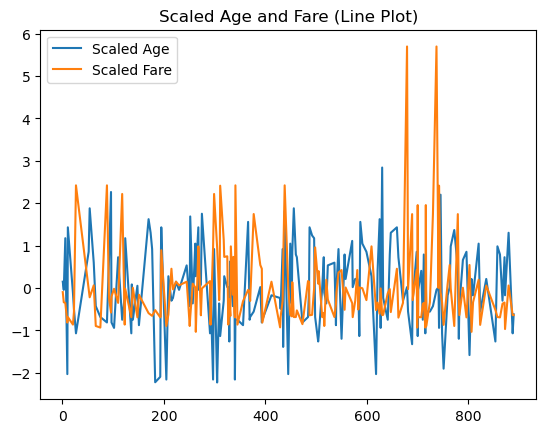

In [81]:
#s5 plots

import matplotlib.pyplot as plt

# Simple line plot of Age and Fare
plt.plot(df['Age'], label='Scaled Age')
plt.plot(df['Fare'], label='Scaled Fare')
plt.title('Scaled Age and Fare (Line Plot)')
plt.legend()
plt.show()



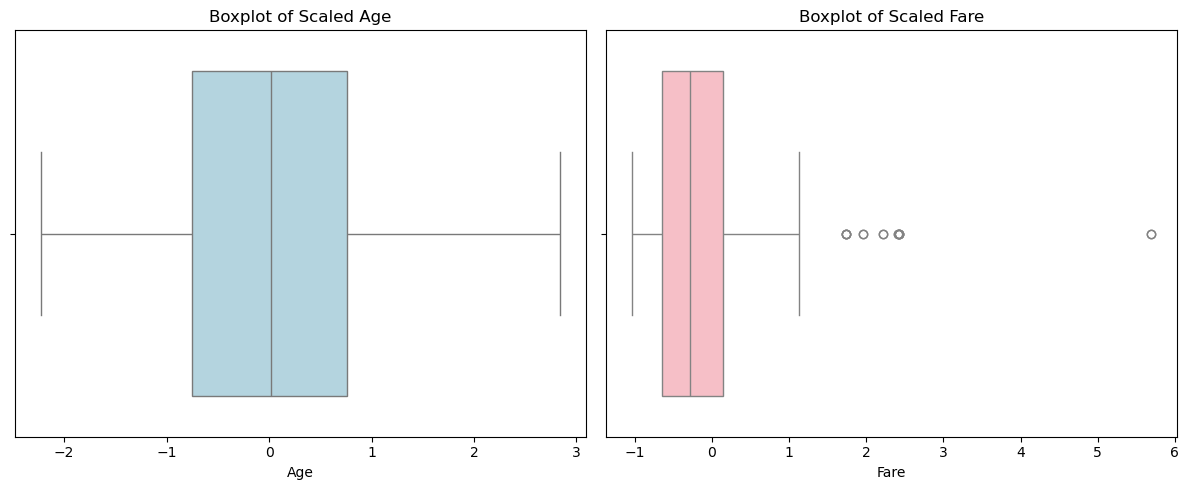

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Boxplot for Age
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'], color='lightblue')
plt.title('Boxplot of Scaled Age')

# Boxplot for Fare
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'], color='lightpink')
plt.title('Boxplot of Scaled Fare')

plt.tight_layout()
plt.show()

In [84]:
#remove rows
df = df[(df['Age'] > -3) & (df['Age'] < 3)]
df = df[(df['Fare'] > -3) & (df['Fare'] < 3)]

print("After removing outliers, shape is:", df.shape)

After removing outliers, shape is: (181, 12)
